## MinAvgTwoSlice

A non-empty array A consisting of N integers is given. A pair of integers (P, Q), such that 0 ≤ P < Q < N, is called a slice of array A (notice that the slice contains at least two elements). The average of a slice (P, Q) is the sum of A[P] + A[P + 1] + ... + A[Q] divided by the length of the slice. To be precise, the average equals (A[P] + A[P + 1] + ... + A[Q]) / (Q − P + 1).

For example, array A such that:

    A[0] = 4 
    A[1] = 2
    A[2] = 2
    A[3] = 5
    A[4] = 1
    A[5] = 5
    A[6] = 8
    
contains the following example slices:

slice (1, 2), whose average is (2 + 2) / 2 = 2;<br>
slice (3, 4), whose average is (5 + 1) / 2 = 3;<br>
slice (1, 4), whose average is (2 + 2 + 5 + 1) / 4 = 2.5.

The goal is to find the starting position of a slice whose average is minimal.

Write a function:

**def solution(A)**

that, given a non-empty array A consisting of N integers, returns the starting position of the slice with the minimal average. If there is more than one slice with a minimal average, you should return the smallest starting position of such a slice.

For example, given array A such that:

    A[0] = 4
    A[1] = 2
    A[2] = 2
    A[3] = 5
    A[4] = 1
    A[5] = 5
    A[6] = 8
    
the function should return 1, as explained above.

Write an efficient algorithm for the following assumptions:

N is an integer within the range [2..100,000];<br>
each element of array A is an integer within the range [−10,000..10,000].

In [10]:
%matplotlib inline
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
import time as time

import math
import operator

In [11]:
def prefix_sums(A):
    n = len(A)
    P = [0] * (n + 1)
    for k in range(1, n + 1):
        P[k] = P[k - 1] + A[k - 1]
    return P

def count_total(P, x, y): 
    return P[y + 1] - P[x]


def solution(A):

    I = prefix_sums(A) # integral of A 
    
    # differentiate I for different slice windows lengths -> minimum derivative must indicate lowest local average

    PI = prefix_sums(I) # prefix sum of I / useful for fast slicing of I
    
    min_slice_start = []
    min_slice       = []
    slice_lengths = range(2,min(4,len(A)+1))
    
    for n in slice_lengths: # go through all possible slice lengths
  
        tmp  = list(map(lambda x: x[0] - x[1], zip(PI[n:],PI[:-n]) ))
        diff = list(map(lambda x: (x[0] - x[1])/n, zip(tmp[1:], tmp[:-1])))

        minimum = min(diff) # minimum of derivative gives minimum slice 
        min_slice.append(minimum) # remember minimum slice for slice length n

        min_index = diff.index(minimum) # get the (smallest) start index
        min_slice_start.append(min_index) # remember minimal start index for the given slice length n

    # determine minimum position
    optimal_slice_length_i = min_slice.index(min(min_slice))
    optimal_slice_length   = slice_lengths[optimal_slice_length_i]
    optimal_slice_start    = min_slice_start[optimal_slice_length_i]
    
    #print('Optimal slice length: {}'.format(optimal_slice_length))
    
    return optimal_slice_start


#A = [4,2,3,1,2,5,1,5,8]
#A = [7,8,6,6,7,6,5,5,7,4,1,1000,3,4,5,7]
#A = [4,2,2,5,1,5,8]
A = [0,0,0,0,0,0]

solution(A)

0

Text(0, 0.5, 'time')

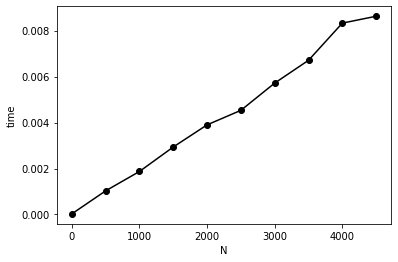

In [13]:
# check time complexity
import time as time

n_range = np.arange(2,5000,500)

speedA = []
results = []
for N in n_range:

    A = list(np.random.randint(-1e4,1e4,N))
    
    t1 = time.time()
    results.append(solution(A))
    t2 = time.time()
    speedA.append(t2-t1)

plt.plot(n_range, speedA, 'ko-')
plt.xlabel('N')
plt.ylabel('time')